<a href="https://colab.research.google.com/github/HBLazerr/pokemon-data-analysis/blob/main/Pokemon_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pokemon Dataset**

This is a Pokemon dataset which contains details about all 802 Pokemon. It includes stats like speed, HP, legendary status, attack, generations, abilities, special attacks, type, classification, etc. The data is from a Kaggle dataset I found from an article under good datasets for analysis. This dataset is a good choice because it allows for EDA and everything mentioned in the requirements. More specifically, I was thinking I can test to see which stats are the strongest in affecting whether or not a Pokemon is legendary and seeing what I can find.

**Load Dataset**

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('pokemon.csv')

# Quick check to make sure dataset loaded correctly
print(data.head()) # first 5 rows

                     abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1      

**Data Cleaning**

In [2]:
# Fill missing values for type2 column w 'None'
# some pokemons do not have secondary types so thats why we have empty values to replace
data.fillna({'type2': 'None'}, inplace=True)

# Check again if any values are missing in dataset
print("\nMissing Values After Cleaning:\n")
print(data.isnull().sum())


Missing Values After Cleaning:

abilities             0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
classfication         0
defense               0
experience_growth     0
height_m             20
hp                    0
japanese_name         0
name                  0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
type1                 0
type2                 0
weight_kg            20
generation            0
is_lege

**Exploratory Data Analysis (EDA)**

In [3]:
# Summary statistics for numerical columns (mean, max, min, std, etc.)
print("\nSummary Statistics:\n")
print(data.describe())

# Get general dataset info (rows, columns, total elements, data types)
print(f"{data.shape[0]} Rows, {data.shape[1]} Columns")
print(f"Total elements: {data.size}")
print("\nAll column data types:\n")
print(data.dtypes)

# Check for/if any empty values
print("\nMissing Values:\n")
print(data.isnull().sum())

# Get counts of pokemon in every generation
print("\nNumber of Pokemon in each Generation:")
print(data['generation'].value_counts().sort_index())  # sort by generation (1-5)
# counts of legendary pokemon in every generation
print("\nLegendary Pokemon in each generation:")
print(data[data['is_legendary'] == 1]['generation'].value_counts().sort_index())
# Legendary and Non legendary pokemon
print("\nLegendary vs Non Legendary Pokemon (0: Non Legendary, 1: Legendary):")
print(data['is_legendary'].value_counts())


Summary Statistics:

       against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000        0.250000   
25

**PLOTS - Exploratory Data Analysis (EDA)**

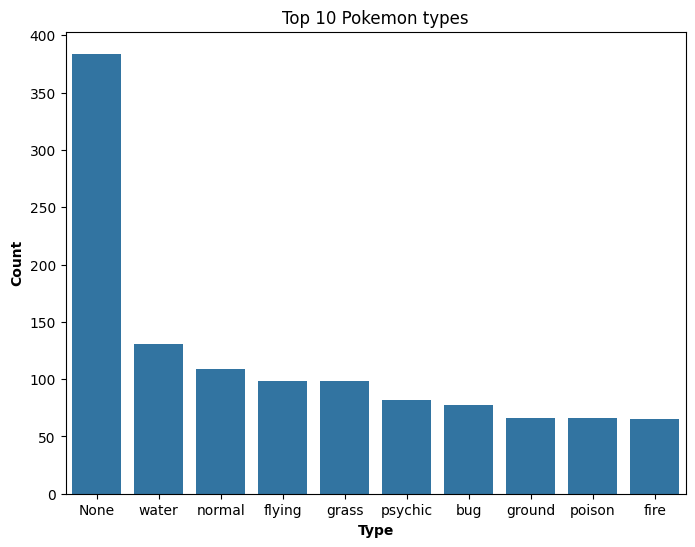

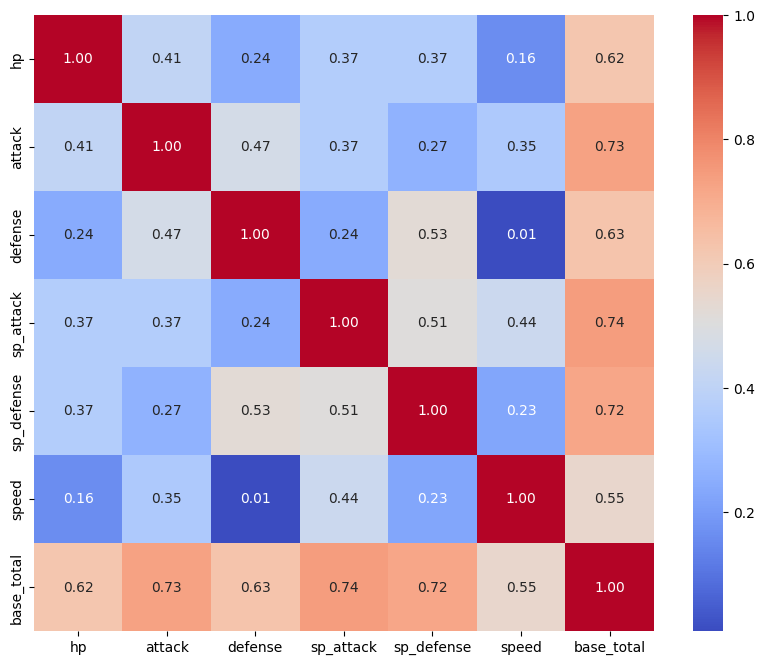

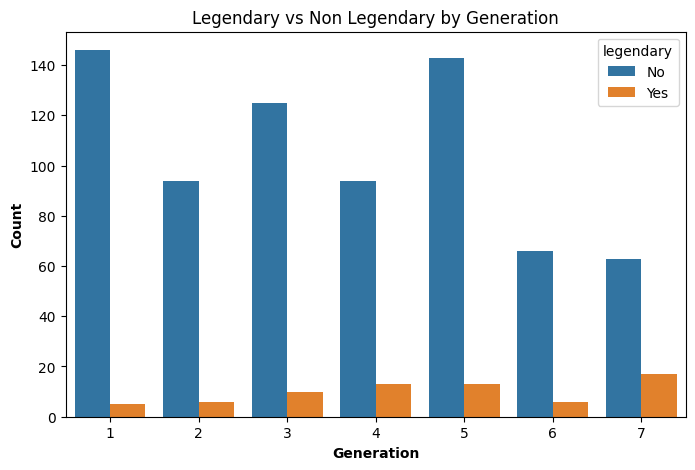

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine 'type1' and 'type2' into one col
# AKA the Pokemon's primary (1) and secondary (2) types
plt.figure(figsize=(8, 6)) # 8x6
types_counts = pd.concat([data['type1'], data['type2']]).value_counts()  # count num of combined types
sns.barplot(x=types_counts.index[:10], y=types_counts.values[:10])  # get just the highest 10
# titles & labels
plt.title('Top 10 Pokemon types')
plt.xlabel('Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

# Heatmap of the pokemon datasets number columns vs each other
plt.figure(figsize=(10, 8)) # 10x8
# .corr() - calcs each columns correlation against all the other columns
corr_matrix = data[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Legendary vs Non Legendary Plot for each gen
# this is to see which gens have the most legendary Pokemon seeing if generation might have anything to do with it being legendary
plt.figure(figsize=(8, 5)) # 8x5
sns.countplot(data=data, x='generation', hue='is_legendary')  # makes it diff colors
# titles & labels
plt.title('Legendary vs Non Legendary by Generation')
plt.xlabel('Generation', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title="legendary", labels=["No", "Yes"])  # replace 0 & 1 w No & Yes
plt.show()

**Machine Learning**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Creates feature and target variable
target = 'is_legendary'  # this is the column to predict
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']

X = data[features]  # Feature (predictor)
y = data[target]  # Target

# split dataset into 80% being training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # for reproducing

# Initializes model and fits to training data from above
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)  # predict target values

**Model Performance**


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       0.87      0.72      0.79        18

    accuracy                           0.96       161
   macro avg       0.92      0.85      0.88       161
weighted avg       0.95      0.96      0.95       161


Confusion Matrix:

[[141   2]
 [  5  13]]

 Accuracy:

0.9565217391304348


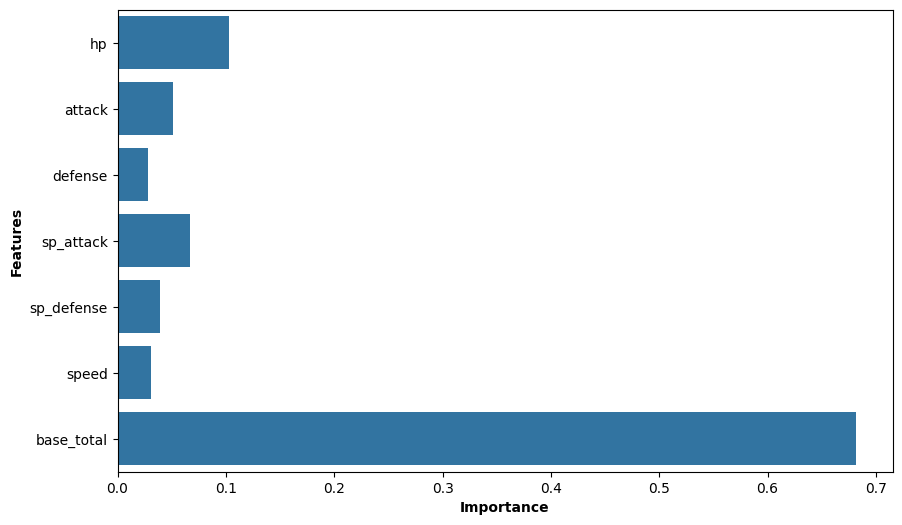

In [6]:
# Eval model performance w the classificaton report for each class
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))  # precision, recall, F1-score
# Show confusion matrix to see how well it predicted
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))  # actual vs predicted

print("\n Accuracy:\n")
print(accuracy_score(y_test, y_pred))

# this is to visualize the feature importance to see which stats affect the predictions the most
feature_importance = model.feature_importances_  # gets importance scores
plt.figure(figsize=(10, 6)) # 10x6
sns.barplot(x=feature_importance, y=X.columns)
# labels
plt.xlabel('Importance', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.show()

**Insights**

From the overall analysis of the pokemon dataset, there were a few interesting things that I noticed. The data had 801 rows and 41 columns which were pretty clean as it only had few missing values scattered around mainly in type2, height_m, and weight_kg. To clean this up, I decided to just fill type2 with the value 'None' since not all pokemon have a secondary type that way it wouldn't mess up when I throw off my result like when I combined each Pokemon's primary and secondary types to find the most common types which ended up being water and normal. From the EDA part of it, I saw that generation five had the most Pokémon overall, but Generations four along with five had the highest number of Legendary Pokémon which I thought was interesting. In my heatmap, you can see that base_total was the highest correlated with sp_attack, attack, and sp_defense stats so my guess is these make up most of the Pokemon's total. The model itself got a score of 95.6% with precision, recall, and the F1 score being higher for non legendary compared to the legendaries. The feature importance plot I ended up adding last minute confirmed that the base total was way overly correlated with stats compared to the rest but this was because base_total is of all of them in one. The runner ups were hp, sp_attack, and attack. Overall though the model performed well in findng patterns within the dataset and proving that specials and attacks strongly added to whether or not the Pokemon is legendary.